# **Understanding different types of Feature Normalization techniques used in Deep Learning Models**

In [1]:
import torch
import tensorflow as tf

# Normalization layers in Deep Learning Models
While building Deep Learning model, We often cares about how **better** and **faster** the model learns between the hidden layers. When the computations passes from one layer to another layer, It is very necessary to keep the computed values within a **limit** before passing to another layer for proper learning.
Thus, Normalization layers normalizes the activations of a layer, which helps to stabilize training by reducing internal covariate shift.
Also, It allows every layer of the network to do learning more independently.

**Note**: These are also called **feature normalization** methods

**Use Cases**: Deep Learning, Computer Vision, RNN, Generative Models etc.

There are various types of Normalization layers used in different type of problems:
1. *Batch Normalization* (**BN**)
2. *Layer Normalization* (**LN**)
3. *Instance Normalization* (**IN**)
4. *Group Normalization* (**GN**)


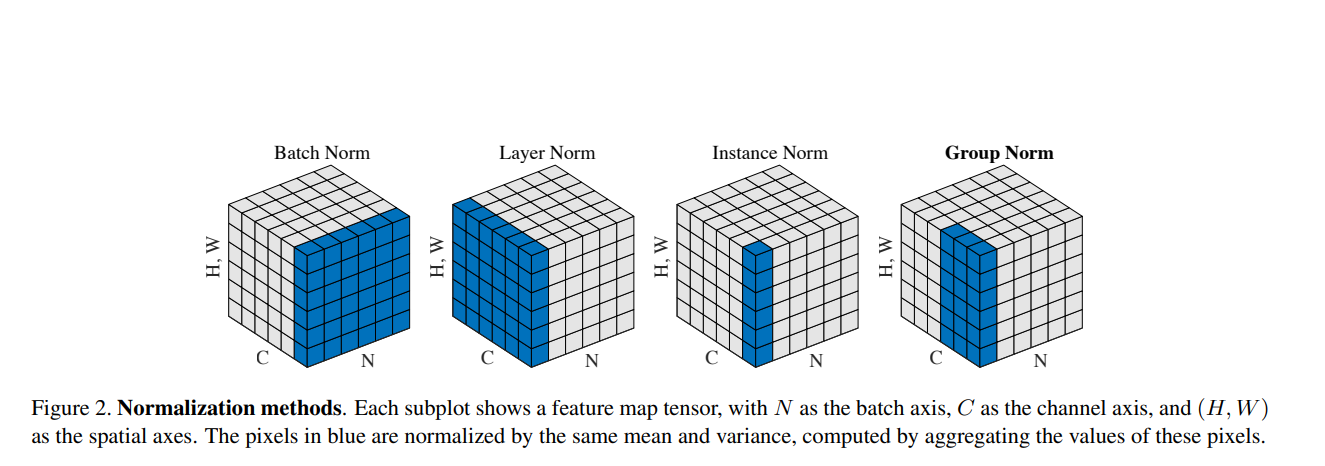

--------> Image from original paper mentioned in the end.



**How above normalization layers are used** ?




*   This layer comes in standard format, for e.g:

 **tf.keras.layers.BatchNormalization(scale=False, center=True)**
*   If you use center=True in batch norm, you do not need biases in your layer. The batch norm offset plays the role of a bias.

*   If you use an activation function that is scale-invariant (i.e. does not change shape if you zoom in on it) then you can set scale=False. ReLu is scale-invariant. Sigmoid is not.


*   This layer goes between the output of a layer and its activation function.



Let's understand each normalization types in more details and specific use cases.

In [2]:
# 1. Batch Normalization (BN)
"""
Our input pixel values are in the range [0,1] and this is compatible with the dynamic
range of the typical activation functions and optimizers. However, once we add a hidden
layer, the resulting output values will no longer lie in the dynamic range of the
activation function for subsequent layers. When this happens, the neuron output is zero,
and because there is no difference by moving a small amount in either direction, the
gradient is zero. There is no way for the network to escape from the dead zone.

To fix this, batch norm normalizes neuron outputs across a training batch of data,
i.e. it subtracts the average and divides by the standard deviation. This way, the
network decides, through machine learning, how much centering and re-scaling to
apply at each neuron.
"""

# In Tensorflow
BN_layer = tf.keras.layers.BatchNormalization(scale=False, center=True)

# In Pytorch
C = 100 # Number of channnels
bn_layer = torch.nn.BatchNorm2d(num_features= C)
"""
Input: (N=batch_size, C=channels, H=height, W=width)

Output: (N,C,H,W) (same shape as input)
"""

'\nInput: (N=batch_size, C=channels, H=height, W=width)\n\nOutput: (N,C,H,W) (same shape as input)\n'

# Batch Normalization
BN normalizes the features by the mean
and variance computed within a (mini-)batch. This has been
shown by many practices to ease optimization and enable
very deep networks to **converge**. The **stochastic uncertainty**
of the batch statistics also acts as a **regularizer** that can benefit generalization. BN has been a foundation of many state of-the-art computer vision algorithms.

Importantly, batch normalization works differently during training and during inference.

1. During Training:

 The layer normalizes its output using the mean and standard deviation of the current batch of inputs.
 That is to say, for each **channel** being normalized, the layer returns

 x' = **(gamma * (batch - mean(batch)) / sqrt(var(batch) + epsilon) + beta)**

 This means that the pixels sharing the same channel index are normalized together.

 * **epsilon** is small constant
 * **gamma** is a learned scaling factor (initialized as 1)
 * **beta** is a learned offset factor (initialized as 0)

2. During Inference:

 The layer normalizes its output using a **moving** **average** of the mean and standard deviation of the batches it has seen during training.

And For **Distributed Training**,

When **synchronized=True** is set and if this layer is used within a tf.distribute strategy, there will be an allreduce call to aggregate batch statistics across all replicas at every training step. Setting synchronized has no impact when the model is trained without specifying any distribution strategy.

For more detailed **tensorflow** reference, please refer [here](https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization).



For detailed **pytorch** reference, please refer [here](https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html).


In [ ]:
# Batch Normalization Drawbacks:
"""
Despite its great success, BN exhibits drawbacks that are
also caused by its distinct behavior of normalizing along
the batch dimension. In particular, it is required for BN
to work with a sufficiently large batch size (e.g., 32 per
worker.

A small batch leads to inaccurate estimation of the batch
statistics, and reducing BN’s batch size increases the model
error dramatically
"""

# Why do we need **smaller** batch sizes ?

The restriction on batch sizes is more demanding in **computer** **vision** tasks including detection, segmentation, video recognition, and other highlevel systems built on them. For example, the **Fast/er** and
**Mask R-CNN** frameworks use a **batch size** of
**1 or 2 images** because of higher resolution, where BN is
“frozen” by transforming to a linear layer; in video
classification with **3D convolutions**, the presence of
spatial-temporal features introduces a trade-off between the
temporal length and batch size.


Batch Normlization being dependent on batch sizes, It degrades the model accuracy in cases of smaller batch size.

**Note**: For batch size greater than or equal to **32** performs well with Batch Normalization but not with lesser ones.

Thus, for smaller batch size, It had been observed that other feature normalization techniques which are **batch independent** performs well.


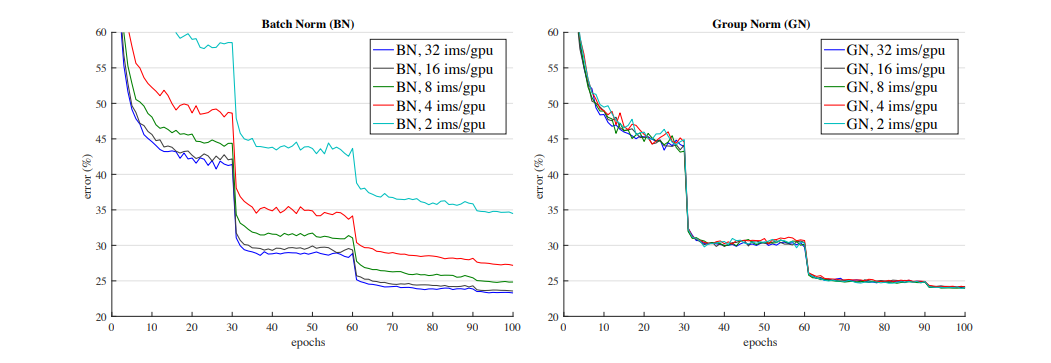

---------------> Image from original paper mentioned in the end.

In [ ]:
# Group Normalization
"""
This layer that divides channels into groups and normalizes the features within
each group. GN does not exploit the batch dimension, and its
computation is independent of batch sizes.

  "Group Normalization can naturally transfer from pre-training to fine-tuning."

  1. This statement suggests that GN is a normalization technique that behaves
     consistently and effectively when applied to deep neural networks in transfer
     learning scenarios.

  2. When a neural network is pre-trained on a different task or dataset using GN,
     and then fine-tuned for a specific task, GN continues to work well without
     requiring major adjustments.

  3. The word "naturally" implies that GN seamlessly adapts to the fine-tuning
     process, and it doesn't exhibit significant degradation in performance or
     stability during this transition.
"""

# In tensorflow
GN_layer = tf.keras.layers.GroupNormalization(groups=16)

# In pytorch
gn_layer = torch.nn.GroupNorm(num_channels=16, num_channels=32)


# Group Normalization

In Group Normalization, Channels are divided into number of groups and the pixels in the same group are normalized together by the same mean and variance.

It also follows the same normalization equation with scale and offset factors as in Batch Normalization.

Group Normalization is found to be very stable over a wide range of batch sizes. With lower batch sizes like 2, 4 etc, GN has provided significant reduction in error rate as compared to Batch Normalization.

For more detailed tensorflow reference, visit [here](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GroupNormalization).

For more detailed pytorch reference, visit [here](https://pytorch.org/docs/stable/generated/torch.nn.GroupNorm.html).


**Advantages**: In various **Computer Vision** tasks like, Image segmentation, Object detection, Video classification etc, where high-spatial resolution is required while training the model, very **small batch size** like 1 or 2 is required.


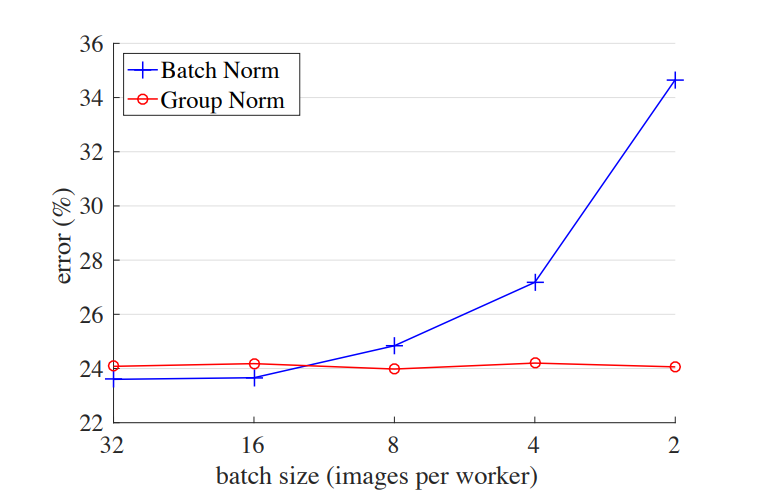

-----------> Image from original paper mentioned in the end

---------------------------------
# Variants of Group Normalization

Imagine, x is the feature computed by a layer, and i is an index.
In the case of 2D images, i = (iN , iC , iH, iW ) is a 4D vector indexing the features in (**N, C, H, W**) order, where N is the **batch axis**, C is the **channel axis**, and H and W are the spatial **height and width** axes.

In GN case, **G** is the number of **groups** which is pre-defined  Hyperparameter.

then, **floor(C/G)** is the number of channels per group.

1. ***Layer Nomalization***:

 GN becomes LN if we set the group number as **G = 1**. Layer Normalization assumes all channels in a layer make “**similar contributions**”.

2. ***Instance Normalization***:

 GN becomes IN if we set the group number as **G = C** (i.e., one channel per group).


 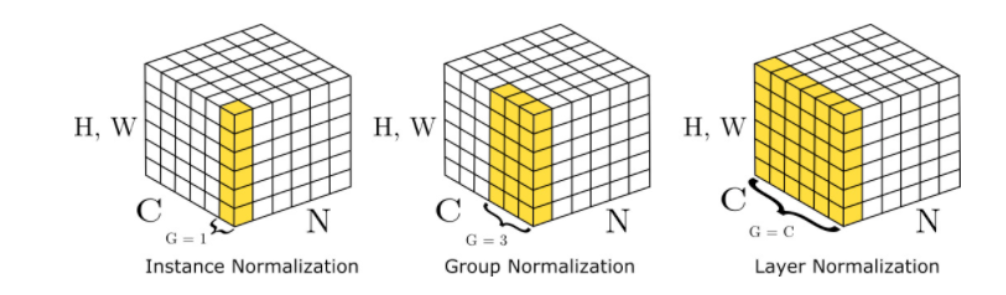

 --------> Image from original paper mentioned in the End.

In [6]:
# Example of Group Normalization and its variants

input = torch.randn(2, 4, 2, 2)
print("input data: \n", input)

# GN : Separate 6 channels into 3 groups
gn_layer = torch.nn.GroupNorm(num_groups=2, num_channels=4)

# LN : Separate 6 channels into one group
ln_layer = torch.nn.GroupNorm(num_groups=1, num_channels=4)

# IN : Separate 6 channels into 6 groups
in_layer = torch.nn.GroupNorm(num_groups=4, num_channels=4)

print("GN output: \n", gn_layer(input))
print("LN output: \n", ln_layer(input))
print("IN output: \n", in_layer(input))


input data: 
 tensor([[[[-0.3953, -1.6393],
          [-0.7472,  0.2838]],

         [[ 0.0172, -0.2544],
          [ 0.7733,  0.9664]],

         [[ 2.3640,  0.2958],
          [ 0.7014,  1.4971]],

         [[-1.3558,  1.1213],
          [-1.0628,  0.1370]]],


        [[[-2.0816, -0.6538],
          [-0.8061, -0.1069]],

         [[-0.0676, -0.4115],
          [ 0.5474, -0.5591]],

         [[ 0.3010,  1.0116],
          [ 1.1269,  0.3578]],

         [[ 0.8825,  0.2196],
          [-0.5305, -0.8872]]]])
GN output: 
 tensor([[[[-0.3442, -1.9248],
          [-0.7912,  0.5187]],

         [[ 0.1799, -0.1651],
          [ 1.1406,  1.3860]],

         [[ 1.6260, -0.1423],
          [ 0.2045,  0.8848]],

         [[-1.5545,  0.5635],
          [-1.3039, -0.2781]]],


        [[[-2.1940, -0.1913],
          [-0.4050,  0.5758]],

         [[ 0.6309,  0.1486],
          [ 1.4935, -0.0585]],

         [[-0.0137,  1.0402],
          [ 1.2111,  0.0706]],

         [[ 0.8487, -0.1344],
        

In [ ]:
# Layer Normalization (LN)

# Normalize the activations of the previous layer for each given example in a
# batch independently, rather than across a batch like Batch Normalization

# Note: These methods are effective for training sequential models (RNN/LSTM)

# GN vs LN
"""
GN is less restricted than LN, because each group of
channels (instead of all of them) are assumed to subject to
the shared mean and variance; the model still has flexibility of
learning a different distribution for each group. This
leads to improved representational power of GN over LN,
as observed by the lower training and validation error in various experiments.
"""

# Training & Validation Error comparison

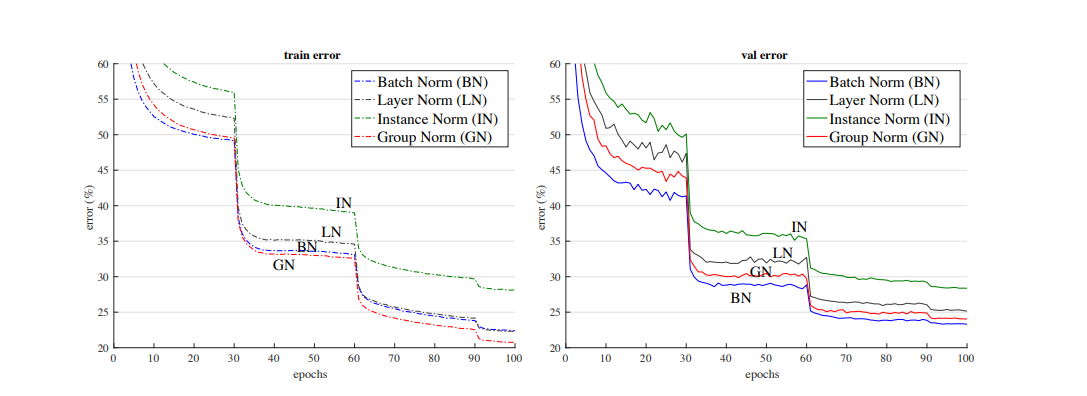

-------> Image from original paper mentioned in the End.

In [ ]:
# Instance Normalization (IN)

# IN computes µ and σ along the (H, W) axes for each sample and each channel.

# Note: These methods are effective for Generative Models (GANs)

# GN vs IN
"""
IN can only rely on the spatial dimension for computing the mean and variance
 and it misses the opportunity of exploiting the channel dependence.
"""

# References:
1. Group Normalization, [refer here](https://arxiv.org/pdf/1803.08494.pdf)